## 贝叶斯

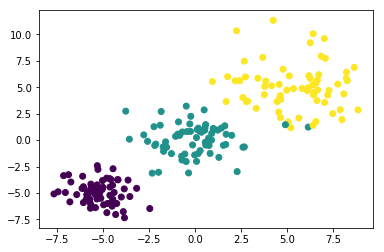

In [5]:
from sklearn.datasets import make_blobs     # 生成聚类测试数据
import matplotlib.pyplot as plt

data, target = make_blobs(n_samples=200,n_features=2,random_state=2,
                          centers=[[-5,-5],[0,0],[5,5]],cluster_std=[1.0,1.5,2.0])
                          
# 每个类别服从独立高斯分布，在2D图中绘制样本，每个样本颜色不同
plt.scatter(data[:,0],data[:,1],c=target)
plt.show()


[2]
[[0.   0.02 0.98]]


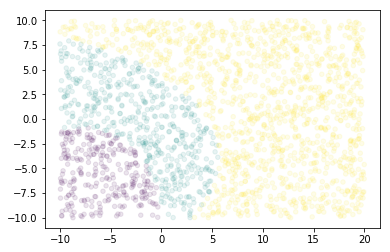

In [4]:
from sklearn.naive_bayes import GaussianNB  # 导入高斯贝叶斯分类函数
import numpy as np

model = GaussianNB()
model.fit(data,target)                # 训练
rng = np.random.RandomState(0)
# 产生2000个二维随机数组测试数据
Xnew = [-10,-10]+[30,20]* rng.rand(2000,2)      
ynew = model.predict(Xnew)

plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, alpha=0.1)
print(model.predict([[3,4]]))  # 预测[3，4]的分类
# array([2])
print(model.predict_proba([[3,4]]).round(2))  # 输出概率分布
# [[0.   0.02 0.98]]


## 鸢尾花数据集降维可视化及贝叶斯分类训练

0.9736842105263158


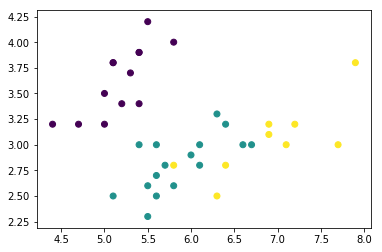

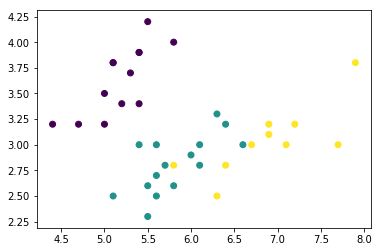

In [7]:
import numpy as np  
from sklearn.datasets import load_iris 
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
import matplotlib.pyplot as plt 
	
# 载入数据集  
iris = load_iris() 
xtrain,xtest,ytrain,ytest=train_test_split(iris.data,iris.target,random_state=1) # 自动分割数据集
# train 112条数据，test38条
model = GaussianNB()                     # 可以看出最简单的分类算法也可以有效的学习这个数据集
model.fit(xtrain,ytrain)
y_pre=model.predict(xtest)
print(accuracy_score(y_pre,ytest))  # 两个数组的相似度。 0.9736842105263158

plt.figure(1)
plt.scatter(xtest[:,0],xtest[:,1],c=ytest)
plt.figure(2)
plt.scatter(xtest[:,0],xtest[:,1],c=y_pre)



In [10]:
# help(plt.scatter)
print(f"xtest")
print(xtest)

numpy 可以直接下标切片、
pandas要iloc/loc/head


xtest
[[5.8 4.  1.2 0.2]
 [5.1 2.5 3.  1.1]
 [6.6 3.  4.4 1.4]
 [5.4 3.9 1.3 0.4]
 [7.9 3.8 6.4 2. ]
 [6.3 3.3 4.7 1.6]
 [6.9 3.1 5.1 2.3]
 [5.1 3.8 1.9 0.4]
 [4.7 3.2 1.6 0.2]
 [6.9 3.2 5.7 2.3]
 [5.6 2.7 4.2 1.3]
 [5.4 3.9 1.7 0.4]
 [7.1 3.  5.9 2.1]
 [6.4 3.2 4.5 1.5]
 [6.  2.9 4.5 1.5]
 [4.4 3.2 1.3 0.2]
 [5.8 2.6 4.  1.2]
 [5.6 3.  4.5 1.5]
 [5.4 3.4 1.5 0.4]
 [5.  3.2 1.2 0.2]
 [5.5 2.6 4.4 1.2]
 [5.4 3.  4.5 1.5]
 [6.7 3.  5.  1.7]
 [5.  3.5 1.3 0.3]
 [7.2 3.2 6.  1.8]
 [5.7 2.8 4.1 1.3]
 [5.5 4.2 1.4 0.2]
 [5.1 3.8 1.5 0.3]
 [6.1 2.8 4.7 1.2]
 [6.3 2.5 5.  1.9]
 [6.1 3.  4.6 1.4]
 [7.7 3.  6.1 2.3]
 [5.6 2.5 3.9 1.1]
 [6.4 2.8 5.6 2.1]
 [5.8 2.8 5.1 2.4]
 [5.3 3.7 1.5 0.2]
 [5.5 2.3 4.  1.3]
 [5.2 3.4 1.4 0.2]]


## 决策树

In [ ]:
划分依据

如果经过某个选定的属性进行数据划分后的信息熵下降最多，则这个划分属性是最优选择 
每次划分之前，我们只需要计算出信息熵增益最大的那种划分即可

0.9210526315789473


[]

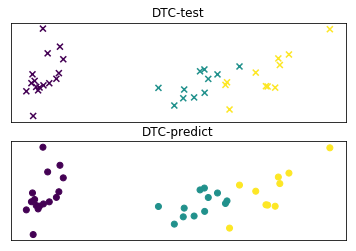

In [11]:
from sklearn.datasets import load_iris   
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.decomposition import PCA  
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  
iris = load_iris()  # 载入数据集
from sklearn.tree import DecisionTreeClassifier  # 导入决策树DTC包 
 
pca=PCA(n_components=2)   # 降维
X=pca.fit_transform(iris.data)  # 降维2个属性。
Y=iris.target          
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,random_state=2) # 分割数据集
clf = DecisionTreeClassifier()  
clf.fit(xtrain, ytrain)
y_pre = clf.predict(xtest)# 预测  
print(accuracy_score(ytest,y_pre))   #0.9210526315789473比贝叶斯要低

fig, ax = plt.subplots(2)
ax[0].scatter(xtest[:,0], xtest[:,1], c=ytest, marker='x')
ax[0].set_title('DTC-test')
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[1].scatter(xtest[:,0], xtest[:,1], c=y_pre, marker='o')  
ax[1].set_title('DTC-predict') 
ax[1].set_xticks([])  ;   ax[1].set_yticks([])


## SVM分类


In [ ]:
定义：支持向量机（Support Vector Machine ,SVM）是一种有监督学习方法，主要思想是建立一个最优决策超平面，
使得该平面两侧距离该平面最近的两类样本之间的距离最大化，
从而对分类问题提供良好的泛化能力。

In [ ]:
这些球叫做 「data」，把棍子叫做 「classifier」, 最大间隙trick 叫做「optimization」， 
拍桌子叫做「kernelling」, 那张纸叫做「hyperplane」

## 聚类问题

In [ ]:
聚类问题是无监督学习的问题，算法的思想就是“物以类聚，人以群分”。
聚类算法感知样本间的相似度，进行类别归纳，对新的输入进行输出预测，输出变量取有限个离散值。


### kmeans

In [ ]:
K-means（又称k-均值或k-平均）聚类算法。算法思想就是首先随机确定k个中心点作为聚类中心，
然后把各个数据点分配给最邻近的中心点，分配完成后将中心点移动到所表示的聚类的平均中心位置处，
然后重复迭代上述步骤直到分配过程不再产生变化位置。

#### 算法流程

In [ ]:
随机选择K个随机的点（称为聚类中心）；
对与数据集中的每个数据点，按照距离K个中心点的距离，将其与距离最近的中心点关联起来，与同一中心点关联的所有点聚成一类；
计算每一组的均值，将该组所关联的中心点移动到平均值的位置；
重复执行2-3步，直至中心点不再变化；

### 鸢尾花聚类分析

In [29]:
iris = load_iris()
print(type(iris))
print(iris)
print(type(iris.data))
print(iris.data)
print(type(iris.target), iris.target.shape)
print(f"iris.target:{iris.target}")



<class 'sklearn.utils.Bunch'>
{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
    

In [25]:
iris = pd.read_csv("./iris.csv")
print(type(iris))
print(iris.head(5))
iris = iris.values
print(type(iris))
print(iris)

<class 'pandas.core.frame.DataFrame'>
   Sepal.Length  Sepal.Width  Petal.Length  Petal.Width Species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa
<class 'numpy.ndarray'>
[[5.1 3.5 1.4 0.2 'setosa']
 [4.9 3.0 1.4 0.2 'setosa']
 [4.7 3.2 1.3 0.2 'setosa']
 [4.6 3.1 1.5 0.2 'setosa']
 [5.0 3.6 1.4 0.2 'setosa']
 [5.4 3.9 1.7 0.4 'setosa']
 [4.6 3.4 1.4 0.3 'setosa']
 [5.0 3.4 1.5 0.2 'setosa']
 [4.4 2.9 1.4 0.2 'setosa']
 [4.9 3.1 1.5 0.1 'setosa']
 [5.4 3.7 1.5 0.2 'setosa']
 [4.8 3.4 1.6 0.2 'setosa']
 [4.8 3.0 1.4 0.1 'setosa']
 [4.3 3.0 1.1 0.1 'setosa']
 [5.8 4.0 1.2 0.2 'setosa']
 [5.7 4.4 1.5 0.4 'setosa']
 [5.4 3.9 1.3 0.4 'setosa']
 [5.1 3.5 1.4 0.3 'setosa']
 [5.7 3.8 1.7 0.3 'setosa']
 [5.1 3.8 1.5 0.3 'set

[0.92461621 0.05301557]


([], <a list of 0 Text yticklabel objects>)

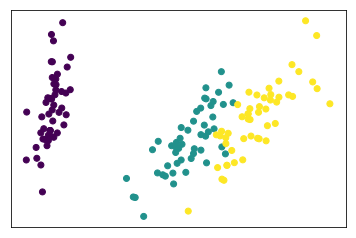

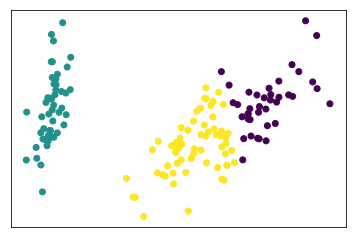

In [26]:
import numpy as np  
from sklearn.decomposition import PCA  
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score  

# iris = load_iris() 
iris= pd.read_csv("./iris.csv")
pca=PCA(n_components=2)     # n_components=.98) 
xtrain=pca.fit_transform(iris.values)  # 降维2个属性。
print(pca.explained_variance_ratio_) 
ytrain=iris.target
model = KMeans(n_clusters=3)
model.fit(xtrain)
label_pred = model.labels_  # 获取聚类标签

plt.figure(1)
plt.scatter(xtrain[:,0],xtrain[:,1],c=ytrain)
plt.xticks(())  
plt.yticks(())  
plt.figure(2)
plt.scatter(xtrain[:,0],xtrain[:,1],c=label_pred)
plt.xticks(())  ;plt.yticks(())  
